In [1]:
import lbg_forecast.sps as sps
import lbg_forecast.sfh as sfh
import lbg_forecast.cosmology as cosmo
import lbg_forecast.emulator as em
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sps_model=sps.initialise_sps_model(neb_em=False)
mimic = em.fsps_emulator("./")

In [3]:
redshift=np.arange(0.01, 2.0, 0.02)
phot1 = []
phot9 = []
em1 = []
for z in redshift:
    
    sps_params = np.array([z, 0.1, 0.5, 0.1, 0.0, 1.0, -3, 0.0, 10**-2, 10, -1, np.random.uniform(-5, 5), 0, -1, -1, -1, 10**8])
    sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))
    em1.append(mimic.mimic_photometry_wmap1(sps_param_resize, 1)[0])

    sps.update_model(sps_model, sps_params, False, sfh.default_agebins())
    phot9.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))
    phot1.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap1(), lya_uncertainity=False, path="./"))

phot1 = np.array(phot1)
phot9 = np.array(phot9)
em1 = np.array(em1)


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


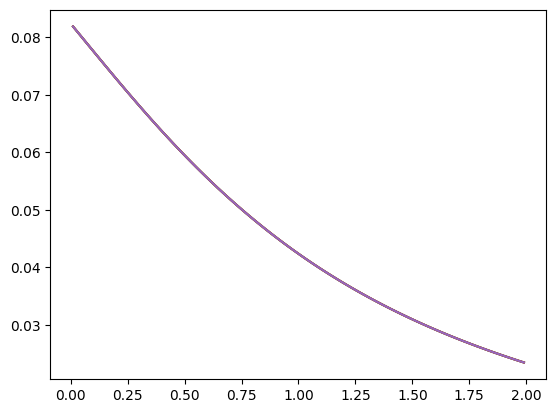

In [4]:
nbands=5
for i in range(nbands):
    diff = (phot9-phot1)[:, i]
    plt.plot(redshift, diff)

wmap1_to_9 = np.vstack((redshift, diff))
#np.savetxt("corrections/wmap1_to_9.txt", wmap1_to_9)

In [ ]:
sps_model=sps.initialise_sps_model(neb_em=True)
mimic = em.fsps_emulator("./")

In [ ]:
spsp = np.load("sps_parameter_samples/sps_test.npy")
sps_parameters = spsp[0, :, :]
i = 0
sps_phot = []
sps_phot_wmap1 = []
while i < sps_parameters.shape[0]:
    sps.update_model(sps_model, sps_parameters[i, :], False, sfh.default_agebins())
    sps_phot.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))
    sps_phot_wmap1.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap1(), lya_uncertainity=False, path="./"))
    i+=1

sps_phot = np.array(sps_phot)
sps_phot_wmap1 = np.array(sps_phot_wmap1)

em_phot = mimic.mimic_photometry(sps_parameters, 100)


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


array([-0.01020078, -0.05560769, -0.05688621, -0.03341949, -0.05839114,
        0.04334509, -0.08254761, -0.02480626, -0.03775202, -0.09838457,
       -0.02898424, -0.0013861 , -0.04431856, -0.00761835, -0.00416056,
       -0.08256894,  0.01354394, -0.02512208, -0.00732827, -0.08208806,
        0.04183743,  0.01746778, -0.06118104, -0.05566215, -0.03787626,
       -0.06607799, -0.08153477,  0.01879054, -0.01320735,  0.0050158 ,
       -0.03898456,  0.0407758 , -0.07841376, -0.14902852, -0.11631314,
       -0.07695755, -0.0448852 , -0.06546192, -0.02889674, -0.02369648,
        0.00862495, -0.04710846, -0.02256965, -0.02613623,  0.02554827,
       -0.09256412, -0.06129158,  0.0248403 , -0.0143274 , -0.05435879,
       -0.02918257, -0.05113154, -0.09155119,  0.01949218, -0.08816675,
       -0.0033576 ,  0.00535282, -0.04081155, -0.03654207, -0.05098076,
       -0.06318633, -0.02049387, -0.01934647, -0.03595664, -0.02917796,
       -0.08924222, -0.06066745, -0.12573333, -0.02717593, -0.01

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


8.34346042921652e-06

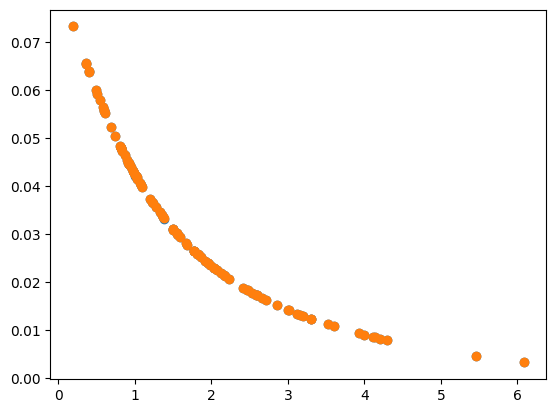

In [29]:
em_phot = mimic.mimic_photometry(sps_parameters, 100)
em_phot1 = mimic.mimic_photometry_wmap1(sps_parameters, 100)
band = 1
diffsps = sps_phot[:, band]- sps_phot_wmap1[:, band]
diffem = em_phot[:, band]- em_phot1[:, band]

plt.scatter(sps_parameters[:, 0], diffsps)
plt.scatter(sps_parameters[:, 0], diffem)
#plt.scatter(sps_parameters[:, 0], sps_phot_wmap1[:, 0])
#plt.scatter(sps_parameters[:, 0], diff9)

max(abs(diffsps - diffem))